In [36]:
!pip install pandas

In [37]:
! pip install numpy

In [38]:
!pip install matplotlib

In [39]:
!pip install mysql-connector-python


In [40]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [42]:
import matplotlib.pyplot as plt
import numpy as np

In [43]:
import plotly.express as px

In [44]:
import pandas as pd

In [45]:
import mysql.connector

host = "127.0.0.1"

user = "root"

password = "123456"

database = "a"

connection = mysql.connector.connect(

    host=host,

    user=user,

    password=password,

    database=database

)

### 1) Retrieve count of all products and producttypes which are ordered by customers [3.5]

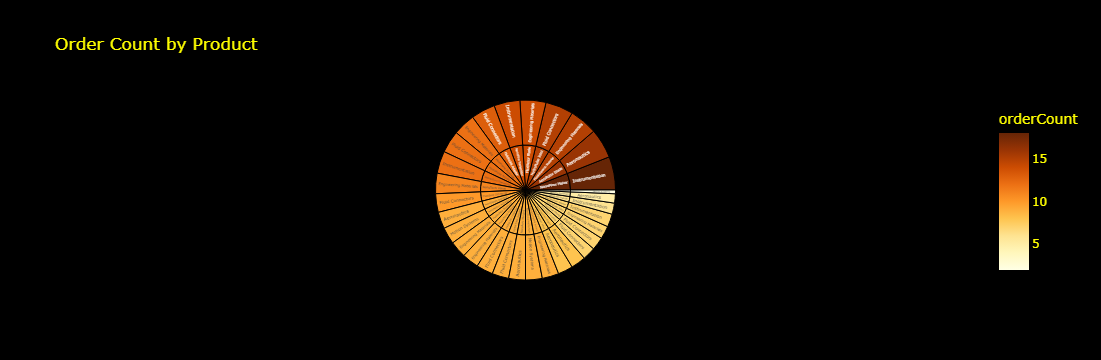

In [46]:
cursor = connection.cursor()
cursor.execute("""
    

SELECT productName, productType, orderCount,
       RANK() OVER (ORDER BY orderCount DESC) AS ProductRank
FROM (
    SELECT p.productName, p.productType, COUNT(*) AS orderCount
    FROM orders o
    JOIN product p ON o.o_plantID = p.productID
    GROUP BY p.productName, p.productType
) AS ProductOrders;
""")
data = cursor.fetchall()

df = pd.DataFrame(data, columns=['productName', 'productType', 'orderCount', 'ProductRank'])
fig = px.sunburst(df, path=['productName', 'productType'], values='orderCount',
                  title='Order Count by Product', color='orderCount',
                  color_continuous_scale='YlOrBr')

fig.update_layout(
    plot_bgcolor='black',   
    paper_bgcolor='black',   
    font=dict(color='yellow')   
)
fig.show()


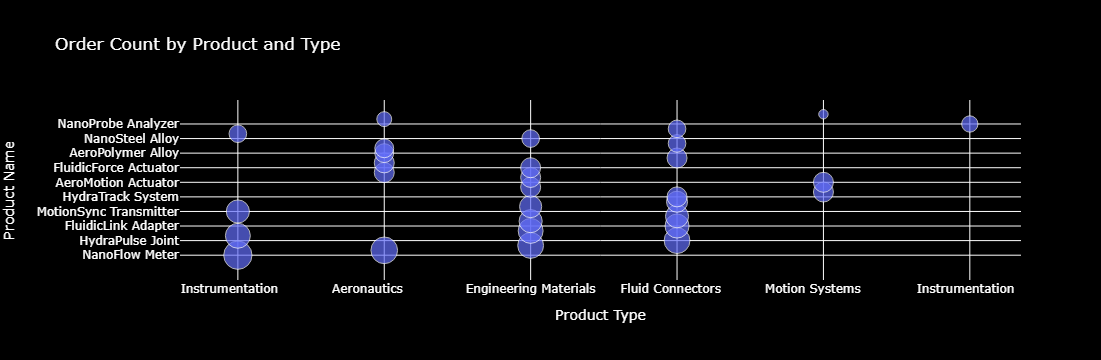

In [47]:
fig = px.scatter(df, x='productType', y='productName', size='orderCount',
                 title='Order Count by Product and Type', hover_name='productName')
fig.update_layout(
    xaxis=dict(title='Product Type'),
    yaxis=dict(title='Product Name'),
    plot_bgcolor='black',   # Background color of the plot area
    paper_bgcolor='black',  # Background color of the chart area
    font=dict(color='white')  # Font color
)

fig.show()


### 2) (EXISTS) Write a SQL query using ‘EXISTS’ that returns the supplierName, supplierID who delivered  the producttype ‘Instrumentation’ [7]

In [48]:
cursor = connection.cursor()
cursor.execute("""
    SELECT s.supplierName, s.supplierID
    FROM supplier s
    WHERE EXISTS (
        SELECT 1
        FROM delivery d
        JOIN product p ON d.d_productID = p.productID
        WHERE d.d_supplierID = s.supplierID
        AND p.producttype = 'Instrumentation'
    );
""")
data = cursor.fetchall()
df = pd.DataFrame(data, columns=['SupplierName', 'SupplierID'])

colors = px.colors.qualitative.Plotly[:len(df)]

fig = px.bar(df, x='SupplierName', y='SupplierID', text='SupplierID',
             labels={'SupplierName': 'Supplier Name', 'SupplierID': 'Supplier ID'},
             title='Suppliers dealing with Instrumentation',
             color='SupplierName', color_discrete_sequence=colors)

fig.update_layout(template='plotly_dark')
fig.update_xaxes(tickangle=45)
fig.show()


C:\Users\DIKSHITA\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



### 3) (WITHOUT LIMIT) Retrieve names and total count of top 5 productNames which were ordered by customers (without LIMIT) [10]

In [49]:
cursor = connection.cursor()
cursor.execute("""
    SELECT productName, orderCount
FROM (
    SELECT p.productName, COUNT(*) as orderCount,
           ROW_NUMBER() OVER (ORDER BY COUNT(*) DESC) as rn
    FROM product p
    JOIN delivery d ON p.productID = d.d_productID
    GROUP BY p.productName
) subquery
WHERE rn <= 5;;
""")
data = cursor.fetchall()

# Convert the fetched data into a Pandas DataFrame
df = pd.DataFrame(data, columns=['productName', 'orderCount'])

# Create a Bar Plot using Plotly with a bright color scale
fig = px.bar(df, x='productName', y='orderCount', text='orderCount',
             title='Top 5 Product Order Counts',
             labels={'productName': 'Product Name', 'orderCount': 'Order Count'},
             color='productName', color_continuous_scale='Viridis')

# Set bright colors, dark background, and adjust plot properties
fig.update_traces(marker=dict(line=dict(color='white', width=1)))
fig.update_layout(template='plotly_dark', xaxis={'categoryorder': 'total descending'})

# Show the plot
fig.show()


C:\Users\DIKSHITA\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



### 4)  CTE) Retrieve top 5 plants which manufacture maximum products without limit [11]

In [50]:
cursor = connection.cursor()
cursor.execute("""
    WITH RankedPlants AS (
        SELECT p.plantID, p.plantCity, p.plantZipcode, COUNT(pr.productID) AS totalProductsManufactured,
               ROW_NUMBER() OVER (ORDER BY COUNT(pr.productID) DESC) AS plant_rank
        FROM manufacturing m
        JOIN product pr ON m.manufacturingID = pr.p_manufacturingID
        JOIN plant p ON m.m_plantID = p.plantID
        GROUP BY p.plantID, p.plantCity, p.plantZipcode
    )
    SELECT plantID, plantCity, plantZipcode, totalProductsManufactured
    FROM RankedPlants
    WHERE plant_rank <= 5;
""")
# Fetch the data
data = cursor.fetchall()

# Convert the fetched data into a Pandas DataFrame
df = pd.DataFrame(data, columns=['plantID', 'plantCity', 'plantZipcode', 'totalProductsManufactured'])

# Create a Bar Plot using Plotly
fig = px.bar(df, x='plantID', y='totalProductsManufactured', text='totalProductsManufactured',
             title='Top 5 Plants Manufacturing the Most Products',
             labels={'plantID': 'Plant ID', 'totalProductsManufactured': 'Total Products Manufactured'},
             color='plantID', color_continuous_scale='Viridis')

# Set dark background and adjust plot properties
fig.update_traces(marker=dict(line=dict(color='white', width=0.5)))
fig.update_layout(template='plotly_dark', xaxis={'title': 'Plant ID', 'tickangle': 45},
                  yaxis={'title': 'Total Products Manufactured'})

# Show the plot
fig.show()


In [51]:
fig = px.box(df, y='totalProductsManufactured',
             labels={'totalProductsManufactured': 'Total Products Manufactured'},
             title='Top 5 Plants Manufacturing the Most Products')

# Set dark background and adjust plot properties
fig.update_traces(marker=dict(color='skyblue'), boxmean=True)
fig.update_layout(template='plotly_dark', yaxis={'title': 'Total Products Manufactured'})

# Show the plot
fig.show()


### 5) (SUBQUERY)Retrieve all the customer names, customerID where the differenece between maximum and minimum orders is strictly above 1 (use subquery) [8]
 

In [52]:
cursor = connection.cursor()
cursor.execute("""
    SELECT customerID, customerName
FROM (
    SELECT c.customerID, c.customerName,
           MAX(o.orderID) - MIN(o.orderID) AS orderDifference
    FROM customer c
    JOIN orders o ON c.customerID = o.o_customerID
    GROUP BY c.customerID, c.customerName
) subquery
WHERE orderDifference > 1;
""")
data = cursor.fetchall()
df = pd.DataFrame(data, columns=['CustomerID', 'CustomerName'])

fig = px.scatter(df, x='CustomerID', y='CustomerName', title='Customers with Order Differences > 1',
                 labels={'CustomerID': 'Customer ID', 'CustomerName': 'Customer Name'},
                 color='CustomerID', opacity=0.7)
fig.update_layout(plot_bgcolor='black', paper_bgcolor='black',
                  font=dict(color='white'), xaxis=dict(gridcolor='grey'),
                  yaxis=dict(gridcolor='grey'))
fig.show()


###  5) Retreive count of orderType of customers from orders

In [53]:
cursor = connection.cursor()
cursor.execute("""
    SELECT orderType, COUNT(*) AS orderTypeCount
    FROM orders
    GROUP BY orderType;
""")
data = cursor.fetchall()

df = pd.DataFrame(data, columns=['orderType', 'orderTypeCount'])

fig = px.pie(df, values='orderTypeCount', names='orderType',
             title='Distribution of Categories', hole=0.4,
             color_discrete_sequence=px.colors.sequential.Viridis)

fig.update_traces(textinfo='percent+label', pull=[0.1] * len(df),
                  marker=dict(line=dict(color='white', width=1)))
fig.update_layout(template='plotly_dark')
fig.show()


### 6) Retrieve cusotmer ID with total discountAmount

In [54]:
cursor = connection.cursor()
cursor.execute("""
    SELECT nr_customerID AS CustomerID, SUM(discountAmount) AS TotalDiscountAmount
    FROM referral
    GROUP BY nr_customerID;
""")
data = cursor.fetchall()

df = pd.DataFrame(data, columns=['CustomerID', 'TotalDiscountAmount'])

fig = px.scatter(df, x='CustomerID', y='TotalDiscountAmount',
                 title='Total Discount Amount vs Customer ID',
                 labels={'CustomerID': 'Customer ID', 'TotalDiscountAmount': 'Total Discount Amount'},
                 color='TotalDiscountAmount', color_continuous_scale='Viridis')

fig.update_traces(marker=dict(size=8, opacity=0.8))
fig.update_layout(template='plotly_dark')
fig.show()

C:\Users\DIKSHITA\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



### 7) Retrieve customerID all the customers along with their  feedbacktype if given

In [55]:
cursor = connection.cursor()
cursor.execute("""
    SELECT f_customerID AS customerID, feedbackType
    FROM feedback;
""")
# Fetch the data
data = cursor.fetchall()

df = pd.DataFrame(data, columns=['customerID', 'feedbackType'])
feedback_counts = df['feedbackType'].value_counts()

fig = px.pie(values=feedback_counts.values, names=feedback_counts.index,
             title='Feedback Type Distribution')

fig.update_traces(textinfo='percent+label', pull=[0.1] * len(feedback_counts), textposition='inside')
fig.update_layout(template='plotly_dark')
fig.show()


In [56]:
fig = px.histogram(df, x='feedbackType', title='Feedback Type Distribution',
                   labels={'feedbackType': 'Feedback Type', 'count': 'Frequency'},
                   color='feedbackType', color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(marker=dict(line=dict(color='white', width=0.5)))
fig.update_layout(template='plotly_dark')
fig.show()

C:\Users\DIKSHITA\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

